<a href="https://colab.research.google.com/github/Jarvis-Geun/DeepLearning-Wiki/blob/main/XAI/SHAP_HTO/svm_shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM model with SHAP

`-` Reference
- [Using SHAP Values to Explain How Your Machine Learning Model Works](https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137)
- [SHAP Values.ipynb](https://github.com/vinyluis/Articles/blob/main/Boruta%20SHAP/SHAP%20Values.ipynb)

## 1. Import

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
plt.style.use('default')

In [39]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 2. Load dataset

In [41]:
from glob import glob
import pandas as pd

file_names = glob("*.xlsx")
# read xlsx format using pandas
# read only first index of the dataset
df = pd.read_excel(file_names[-1], engine="openpyxl")

In [42]:
file_names

['3rd validation HTO_modif_Missing data delete_For AI.xlsx']

In [43]:
df.head(5)

,case no.,PreWBL,Pre\nJLCA,Pre\nMPTA,Pre\nLDFA,Pre Coronal translation),PostWBL,Post\nJLCA,Post\nMPTA,Post\nLDFA,...,Delta Coronal translation,LJSW (Varus),MJSW (Valgus),VVD,"Sex (M:1, F:0)",Age,Height,Weight,BMI,Outcome
0,1,19.726354,4.926667,85.856667,87.710000,3.71,67.400222,3.973333,95.550000,87.026667,...,-1.00,6.72,7.21,-0.49,0,52,152,70,30.30,1
1,2,10.615200,6.420000,85.100000,89.050000,6.71,61.882716,7.350000,95.910000,86.193333,...,-2.25,11.19,9.14,2.05,0,62,149,51,22.97,1
2,3,-5.870595,22.423333,81.133333,90.900000,6.61,25.177793,4.176667,89.660000,91.566667,...,-0.83,8.04,5.65,2.39,0,53,148,68,31.04,1
3,4,31.436854,5.950000,86.766667,88.396667,8.28,58.257285,4.090000,91.866667,86.023333,...,-1.80,8.83,8.90,-0.07,1,61,169,80,28.01,1
4,5,22.523574,3.660000,87.806667,90.406667,6.39,54.622471,4.460000,93.120000,88.263333,...,-3.84,11.09,6.51,4.58,0,52,155,83,34.55,1


### Define X

In [44]:
X = df.iloc[:, :-1]
X.head(5)

,case no.,PreWBL,Pre\nJLCA,Pre\nMPTA,Pre\nLDFA,Pre Coronal translation),PostWBL,Post\nJLCA,Post\nMPTA,Post\nLDFA,...,∆LDFA,Delta Coronal translation,LJSW (Varus),MJSW (Valgus),VVD,"Sex (M:1, F:0)",Age,Height,Weight,BMI
0,1,19.726354,4.926667,85.856667,87.710000,3.71,67.400222,3.973333,95.550000,87.026667,...,-0.683333,-1.00,6.72,7.21,-0.49,0,52,152,70,30.30
1,2,10.615200,6.420000,85.100000,89.050000,6.71,61.882716,7.350000,95.910000,86.193333,...,-2.856667,-2.25,11.19,9.14,2.05,0,62,149,51,22.97
2,3,-5.870595,22.423333,81.133333,90.900000,6.61,25.177793,4.176667,89.660000,91.566667,...,0.666667,-0.83,8.04,5.65,2.39,0,53,148,68,31.04
3,4,31.436854,5.950000,86.766667,88.396667,8.28,58.257285,4.090000,91.866667,86.023333,...,-2.373333,-1.80,8.83,8.90,-0.07,1,61,169,80,28.01
4,5,22.523574,3.660000,87.806667,90.406667,6.39,54.622471,4.460000,93.120000,88.263333,...,-2.143333,-3.84,11.09,6.51,4.58,0,52,155,83,34.55


### Define y label

In [45]:
y = df.iloc[:, -1]
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Outcome, dtype: int64

In [46]:
X.shape, y.shape

((327, 24), (327,))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((261, 24), (66, 24), (261,), (66,))

## 3. Support Vector Machine (SVM)

In [48]:
C = 1     # C : regularization parameter of SVM
model = svm.SVC(kernel="linear", C=C)

In [49]:
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

### 3.1 Evaluate the model

In [50]:
y_pred = model.predict(X_test)

In [51]:
# View accuracy score
accuracy_score(y_test, y_pred)

0.7121212121212122

In [52]:
# View confusion matrix for test data and predictions
# sum of confusion matrix is equal to y_test.shape
confusion_matrix(y_test, y_pred)

array([[10, 14],
       [ 5, 37]])

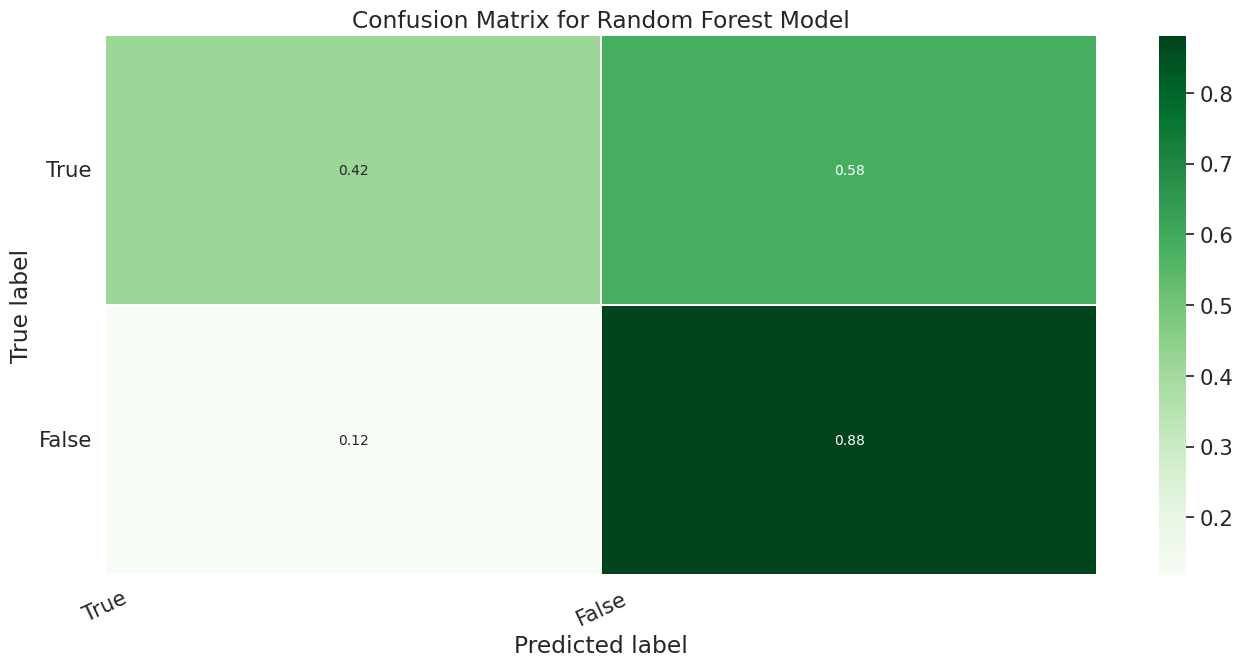

In [53]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['True', 'False']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [54]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.51        24
           1       0.73      0.88      0.80        42

    accuracy                           0.71        66
   macro avg       0.70      0.65      0.65        66
weighted avg       0.70      0.71      0.69        66



## 4. Visualization to compare Kernel SVM models

### 4.1 Define function

## 5. SHAP

In [55]:
import shap

In [36]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
# shap_values variable (three attributes) : .values, .base_values, .data
shap_values = explainer(X_test)

Permutation explainer: 67it [00:21,  1.11it/s]


In [56]:
type(shap_values)

shap._explanation.Explanation

In [57]:
from scipy.special import softmax
import numpy as np

def print_feature_importances_shap_values(shap_values, features):
  '''
  Prints the feature importances based on SHAP values in an ordered way shap_values
  -> The SHAP values calculated from a shap.Explainer object features
  -> The name of the features, on the order presented to the explainer
  '''
  # Calculates the feature importance (mean absolute shap value) for each feature
  importances = []
  for i in range(shap_values.values.shape[1]):
    importances.append(np.mean(np.abs(shap_values.values[:, i])))

  # Calculates the normalized version
  importances_norm = softmax(importances)

  # Organize the importances and columns in a dictionary
  feature_importances = {fea: imp for imp, fea in zip(importances, features)}
  feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}

  # Sorts the dictionary
  feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse=True)}
  feature_importances_norm = {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse=True)}
  
  # Prints the feature importances
  for k, v in feature_importances.items():
    print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [58]:
print_feature_importances_shap_values(shap_values, X_test.columns)

PostWBL -> 0.1524 (softmax = 0.0459)
PreWBL -> 0.1188 (softmax = 0.0444)
Post
JLCA -> 0.1040 (softmax = 0.0437)
Pre
JLCA -> 0.0889 (softmax = 0.0431)
Post Coronal translation -> 0.0780 (softmax = 0.0426)
Delta Coronal translation -> 0.0771 (softmax = 0.0426)
Weight -> 0.0734 (softmax = 0.0424)
Post
LDFA -> 0.0716 (softmax = 0.0423)
Pre
LDFA -> 0.0663 (softmax = 0.0421)
Age -> 0.0603 (softmax = 0.0419)
Pre Coronal translation) -> 0.0579 (softmax = 0.0418)
∆WBLR -> 0.0564 (softmax = 0.0417)
BMI -> 0.0551 (softmax = 0.0416)
Sex (M:1, F:0) -> 0.0488 (softmax = 0.0414)
∆MPTA -> 0.0429 (softmax = 0.0411)
VVD -> 0.0398 (softmax = 0.0410)
Post
MPTA -> 0.0382 (softmax = 0.0409)
MJSW (Valgus) -> 0.0348 (softmax = 0.0408)
case no. -> 0.0235 (softmax = 0.0403)
∆JLCA -> 0.0139 (softmax = 0.0400)
Height -> 0.0078 (softmax = 0.0397)
∆LDFA -> 0.0065 (softmax = 0.0397)
Pre
MPTA -> 0.0036 (softmax = 0.0395)
LJSW (Varus) -> 0.0020 (softmax = 0.0395)


### Bar plot

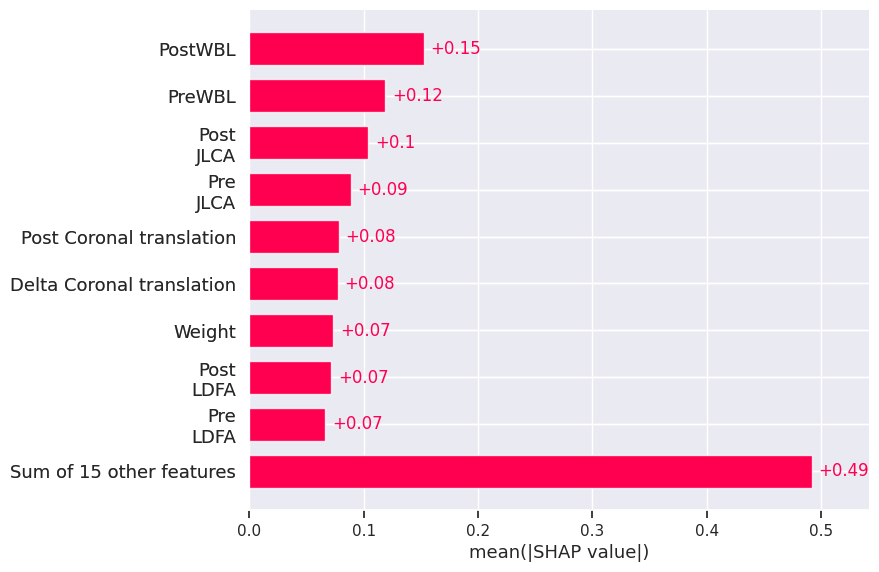

In [59]:
shap.plots.bar(shap_values)

### Summary plot: beeswarm

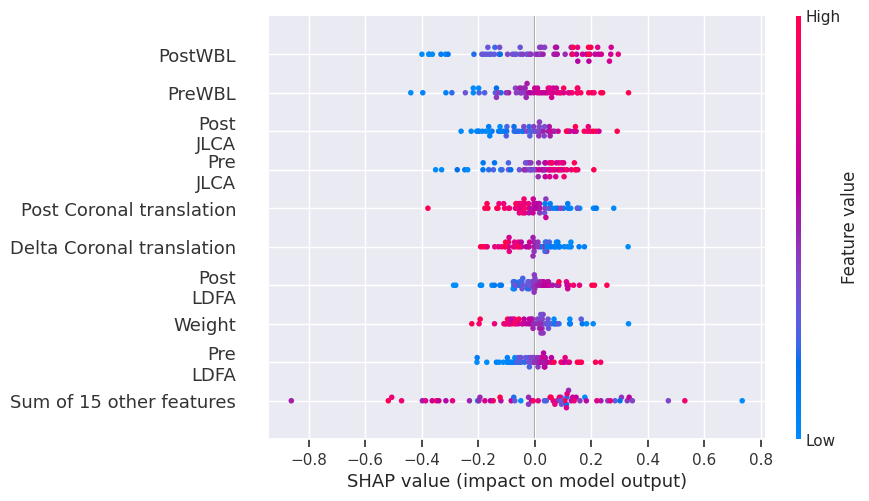

In [27]:
shap.plots.beeswarm(shap_values)

### Summary plot: violin

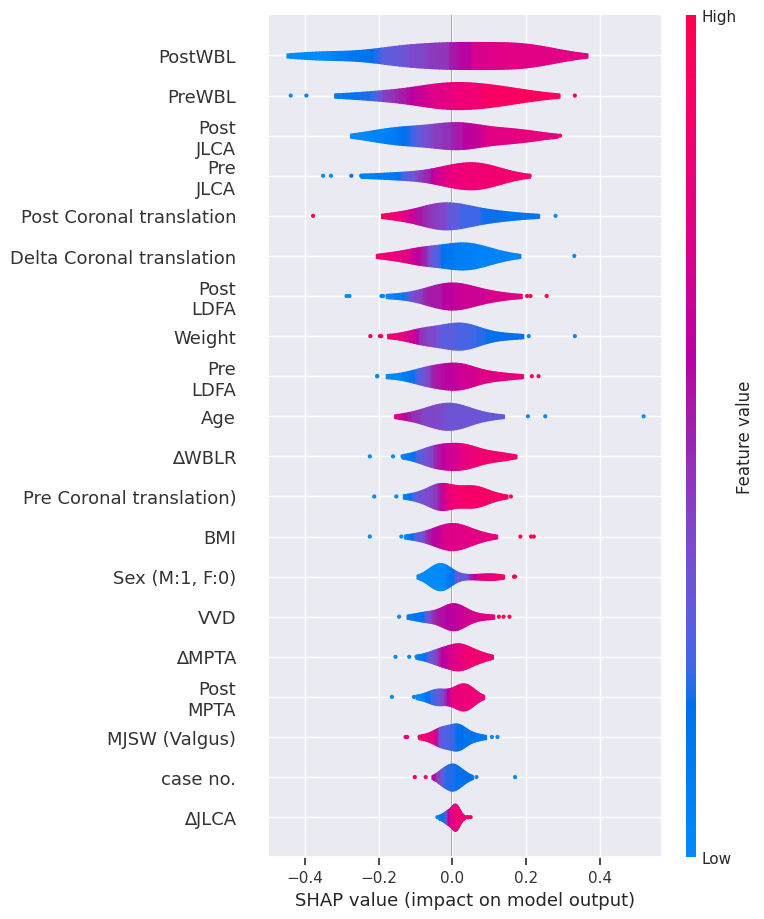

In [28]:
shap.summary_plot(shap_values, plot_type="violin")

### Local bar plot: single observation

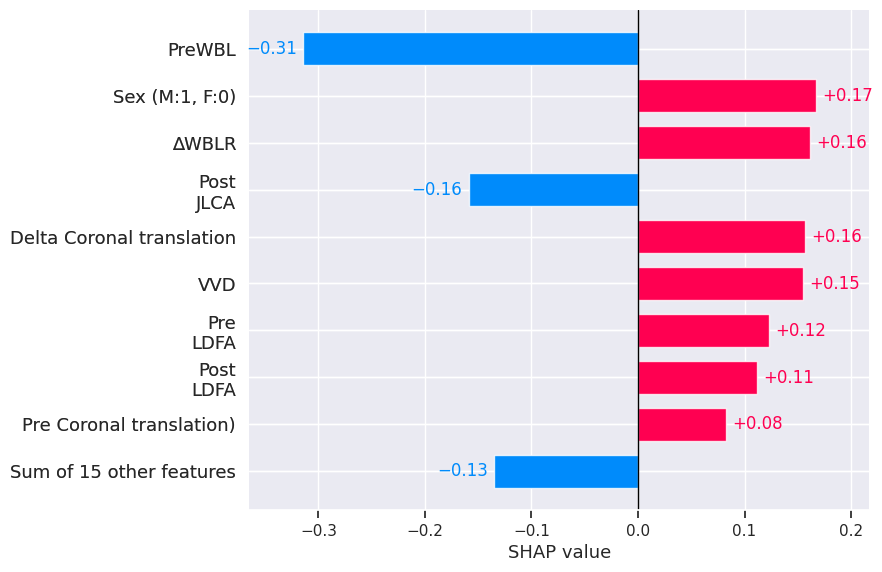

In [29]:
shap.plots.bar(shap_values[0])

### Waterfall plot

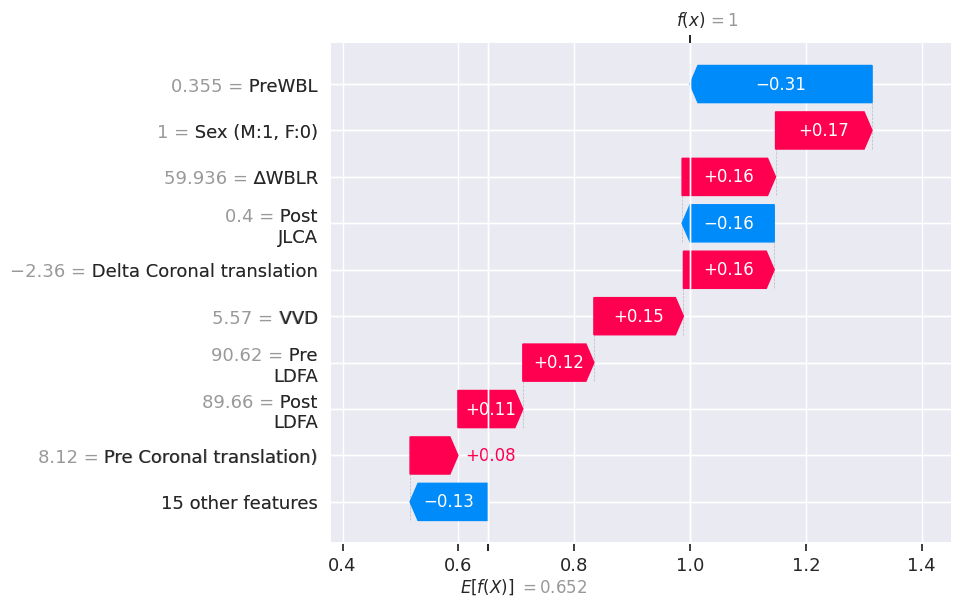

In [30]:
shap.plots.waterfall(shap_values[0])

### Force plot

In [31]:
shap_values[0]

.values =
array([-0.03787879, -0.31439394, -0.01363636,  0.00227273,  0.12272727,
        0.08257576,  0.0219697 , -0.15909091,  0.01893939,  0.11212121,
       -0.05075758,  0.16136364, -0.02121212,  0.04166667, -0.00075758,
        0.15681818, -0.00454545,  0.01969697,  0.15454545,  0.16666667,
       -0.07424242,  0.00530303, -0.05833333,  0.01666667])

.base_values =
0.6515151515151515

.data =
array([320.        ,   0.35530891,   2.275     ,  82.435     ,
        90.62      ,   8.12      ,  60.29116734,   0.4       ,
        92.6       ,  89.66      ,   5.76      ,  59.93585843,
        -1.875     ,  10.165     ,  -0.96      ,  -2.36      ,
        12.22      ,   6.65      ,   5.57      ,   1.        ,
        63.        , 164.        ,  73.        ,  27.14      ])

In [32]:
shap.initjs()
shap.plots.force(shap_values[0])